In [102]:
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input,Dropout,Conv2DTranspose,concatenate
import matplotlib.pyplot as plt
from tensorflow.keras import  layers

from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import os

In [103]:
ls '/home/tazmeen/Documents/LAB_FINAL/dataset'

daisy/  dandelion/  roses/  sunflowers/  tulips/


In [104]:

data_dir = 'dataset/'
IMG_SIZE = (28,28)
BATCH_SIZE = 64
SEED = 42

# 70% 
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.30,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

# 30% 
valtest_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.30,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

Found 2746 files belonging to 5 classes.
Using 1923 files for training.
Found 2746 files belonging to 5 classes.
Using 823 files for validation.


In [105]:

valtest_batches = tf.data.experimental.cardinality(valtest_ds).numpy()
test_batches = valtest_batches // 3 
test_ds = valtest_ds.take(test_batches)
val_ds  = valtest_ds.skip(test_batches)

val_ds  = valtest_ds.skip(test_batches)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

rescale = tf.keras.layers.Rescaling(1./255)

# augmentation 
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
val_ds   = val_ds.map(lambda x, y: (rescale(x), y))
test_ds  = test_ds.map(lambda x, y: (rescale(x), y))



In [110]:
model = Sequential([
   
    Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    
    Dense(5, activation='softmax')
])

model.summary()


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_90 (Conv2D)              │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,181 (477.27 KB)

 Trainable params: 122,181 (477.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.2469 - loss: 1.5643 - val_accuracy: 0.4021 - val_loss: 1.3377
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4337 - loss: 1.3045 - val_accuracy: 0.4550 - val_loss: 1.3222
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4739 - loss: 1.2294 - val_accuracy: 0.4462 - val_loss: 1.2659
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4462 - loss: 1.2573 - val_accuracy: 0.4462 - val_loss: 1.2044
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.4394 - loss: 1.2410 - val_accuracy: 0.4462 - val_loss: 1.3195
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5094 - loss: 1.1529 - val_accuracy: 0.3651 - val_loss: 1.6397
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4880 - loss: 1.1585 - val_accuracy: 0.4850 - val_loss: 1.2688
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5493 - loss: 1.1019 - val_accuracy: 0.5079 - v

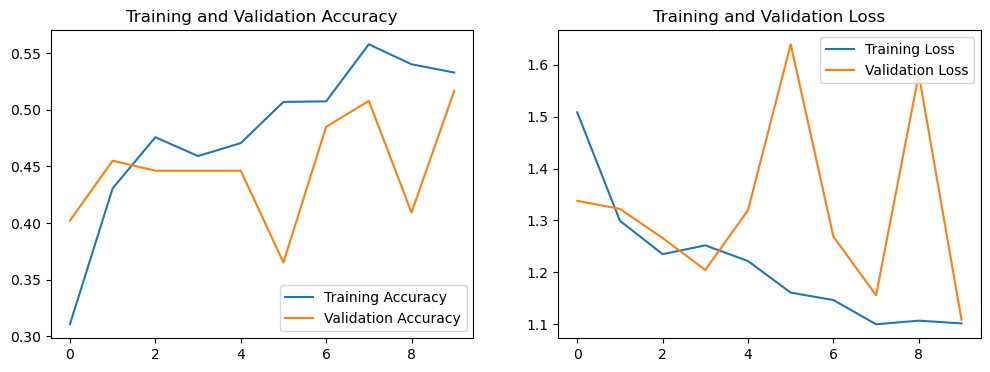

In [107]:




model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [108]:
model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5318 - loss: 1.1258


[1.1215829849243164, 0.54296875]

In [109]:
def build_unet():
    inputs = Input(shape =(128,128,3))
      
    # Encoder
    #Conv Layer 1
    c1 = Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2,2))(c1)
    
    #Conv Layer 2
    c2 = Conv2D(128, (3,3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2,2))(c1)

    #bottleneck
    c3 = Conv2D(128,(3,3),activation='relu', padding='same')(p2)
    
    #Decoder
    
    u1 = Conv2DTranspose(c2,(2,2), strides=(2,2), padding='same')(c3)
    skip1 = concatenate([u1, c1])
    c6 = Conv2D(128, (3,3), activation='relu', padding='same')(u1)
  
    
    u7 = Conv2DTranspose(256, (2,2), strides=(2,2), padding='same')(c6)
    u7 = concatenate([u7, c2])
    c7 = Conv2D(256, (3,3), activation='relu', padding='same')(u7)
    
    output = Conv2D(1,(1,1),activation='sigmoid')
    
    return output


